### Pacakges Required

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm,skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import ensemble
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

#pip install lightgbm
import lightgbm as lgb

### Datasets

In [280]:
train = pd.read_csv('C:/Users/Nithin/Downloads/Linear Regression/Dataset/train.csv')
test = pd.read_csv('C:/Users/Nithin/Downloads/Linear Regression/Dataset/test.csv')

In [281]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**-- Visualization

C:\Users\Nithin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'SalePrice distribution')

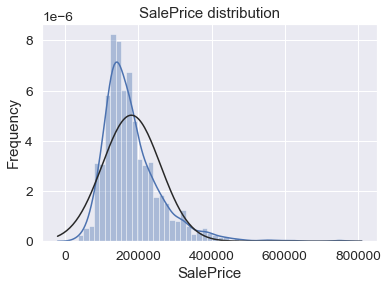

In [282]:
#Outliers
sns.distplot(train.SalePrice,fit=norm)
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

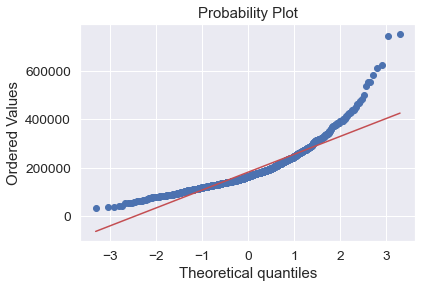

In [283]:
#QQ Plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show() 

### Feature Selection

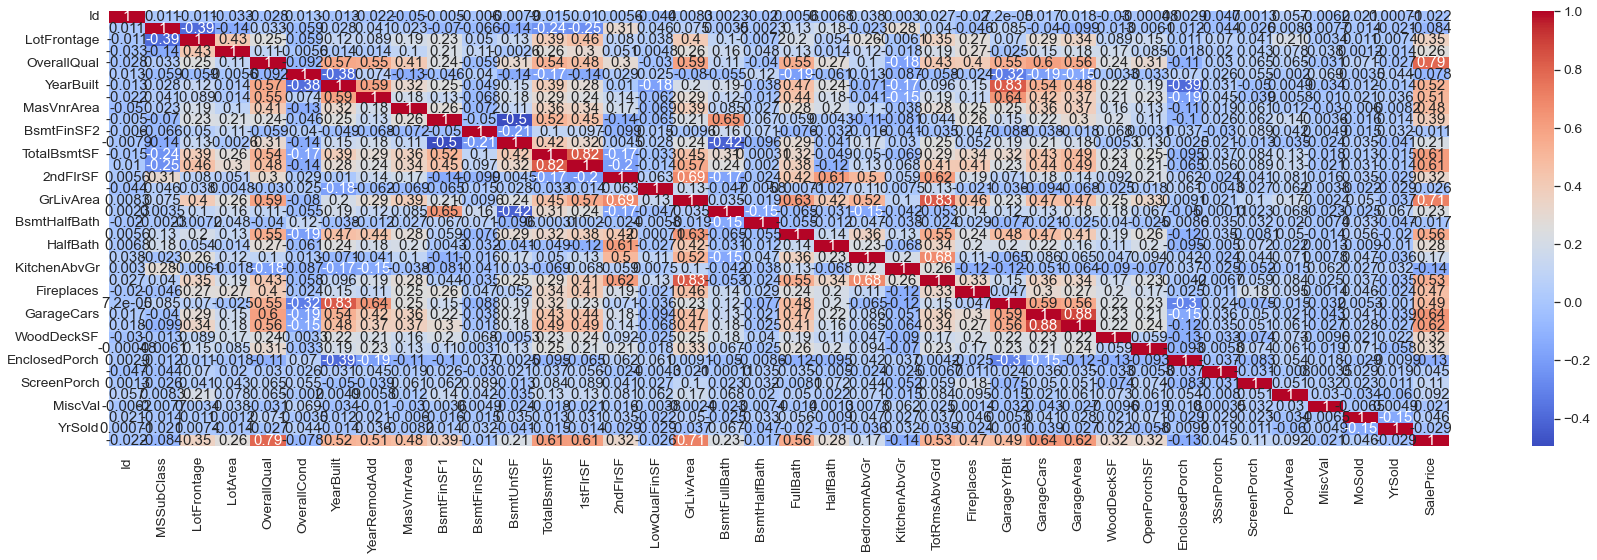

In [284]:
#Corel Matrix
plt.figure(figsize=(30,8))
sns.heatmap(train.corr(),cmap='coolwarm',annot = True)
plt.show()

In [285]:
#Selected Columns
cor = train.corr()
cor[cor['SalePrice']>0.3].index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [286]:
train = train[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]
test = test[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

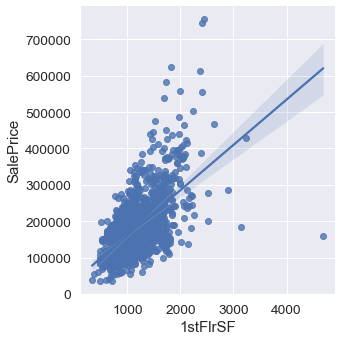

In [287]:
sns.lmplot(x='1stFlrSF',y ='SalePrice',data=train )

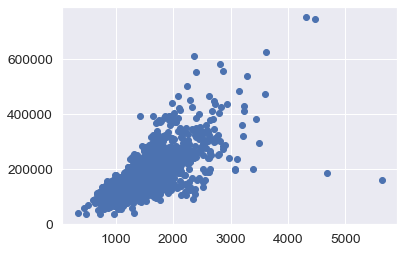

In [288]:
plt.scatter(x= 'GrLivArea', y='SalePrice', data = train)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

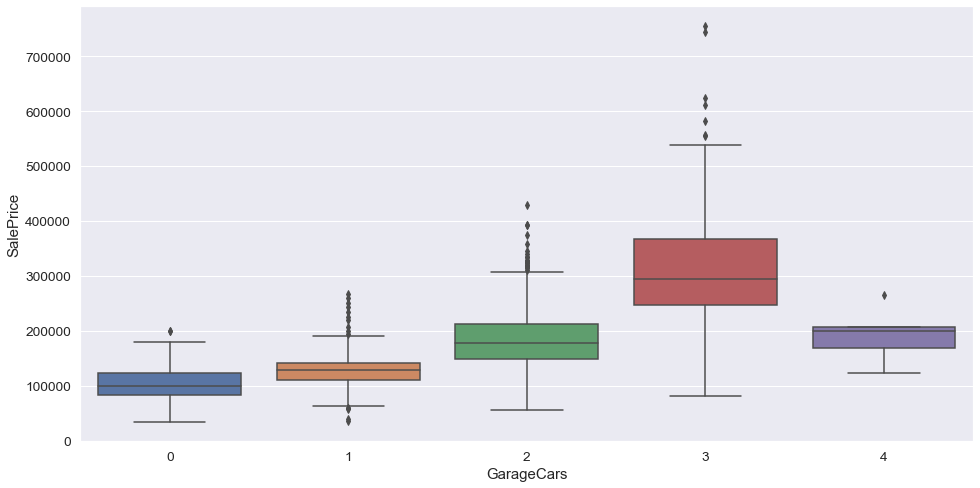

In [289]:
plt.figure(figsize=(16,8))
sns.boxplot(x='GarageCars',y='SalePrice',data=train)

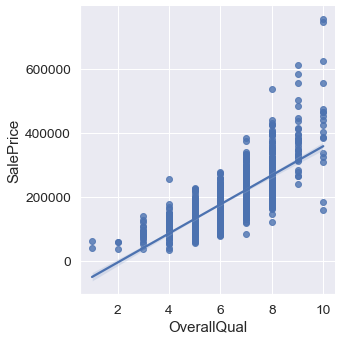

In [290]:
sns.lmplot(x='OverallQual',y='SalePrice',data=train)

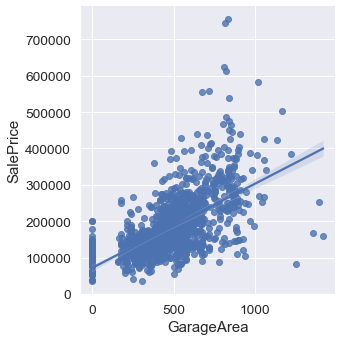

In [291]:
sns.lmplot(x='GarageArea',y='SalePrice',data=train)

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

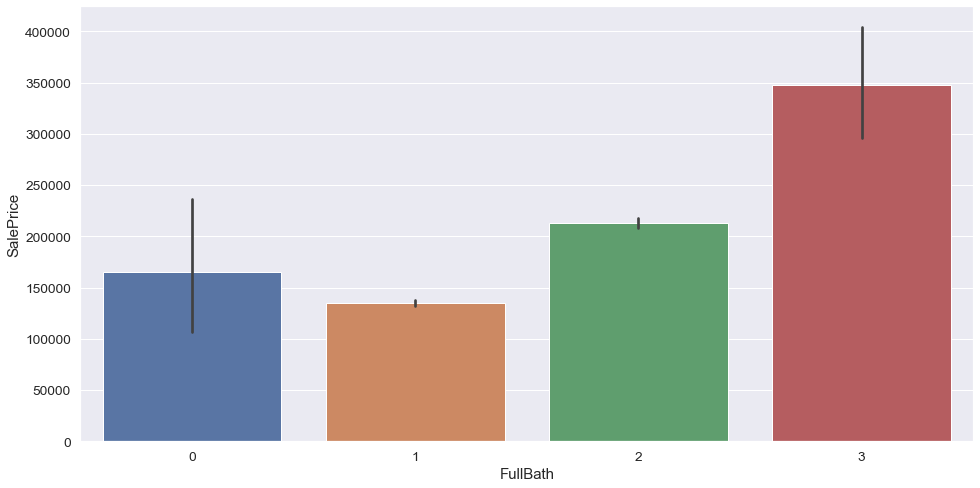

In [292]:
plt.figure(figsize=(16,8))
sns.barplot(x='FullBath',y = 'SalePrice',data=train)

### Missing Value Treatment

**--Train Data**

In [293]:
total = train.isnull().sum().sort_values(ascending=False)
percent = round((train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)*100,2)
miss_data = pd.concat([total,percent],axis=1,keys=['total','percent'])
miss_data

,total,percent
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrArea,8,0.55
FullBath,0,0.00
OpenPorchSF,0,0.00
WoodDeckSF,0,0.00
GarageArea,0,0.00
GarageCars,0,0.00
Fireplaces,0,0.00
TotRmsAbvGrd,0,0.00


In [294]:
train = train.drop((miss_data[miss_data['total'] > 81]).index,1)

C:\Users\Nithin\AppData\Local\Temp/ipykernel_8728/917093935.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train = train.drop((miss_data[miss_data['total'] > 81]).index,1)


In [295]:
total = train.isnull().sum().sort_values(ascending=False)
percent = round((train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)*100,2)
miss_data = pd.concat([total,percent],axis=1,keys=['total','percent'])
miss_data

,total,percent
GarageYrBlt,81,5.55
MasVnrArea,8,0.55
OverallQual,0,0.00
TotRmsAbvGrd,0,0.00
OpenPorchSF,0,0.00
WoodDeckSF,0,0.00
GarageArea,0,0.00
GarageCars,0,0.00
Fireplaces,0,0.00
FullBath,0,0.00


**--Test Data**

In [296]:
total = test.isnull().sum().sort_values(ascending=False)
percent = round((test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)*100,2)
miss_data = pd.concat([total,percent],axis=1,keys=['total','percent'])
miss_data

,total,percent
LotFrontage,227,15.56
GarageYrBlt,78,5.35
MasVnrArea,15,1.03
GarageArea,1,0.07
BsmtFinSF1,1,0.07
TotalBsmtSF,1,0.07
GarageCars,1,0.07
TotRmsAbvGrd,0,0.00
WoodDeckSF,0,0.00
Fireplaces,0,0.00


In [297]:
test = test.drop((miss_data[miss_data['total'] > 78]).index,1)

C:\Users\Nithin\AppData\Local\Temp/ipykernel_8728/1752322681.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test = test.drop((miss_data[miss_data['total'] > 78]).index,1)


In [298]:
total = test.isnull().sum().sort_values(ascending=False)
percent = round((test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)*100,2)
miss_data = pd.concat([total,percent],axis=1,keys=['total','percent'])
miss_data

,total,percent
GarageYrBlt,78,5.35
MasVnrArea,15,1.03
BsmtFinSF1,1,0.07
TotalBsmtSF,1,0.07
GarageArea,1,0.07
GarageCars,1,0.07
OverallQual,0,0.00
TotRmsAbvGrd,0,0.00
WoodDeckSF,0,0.00
Fireplaces,0,0.00


**--Imputation**

In [299]:
#train
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

In [300]:
#Test
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())

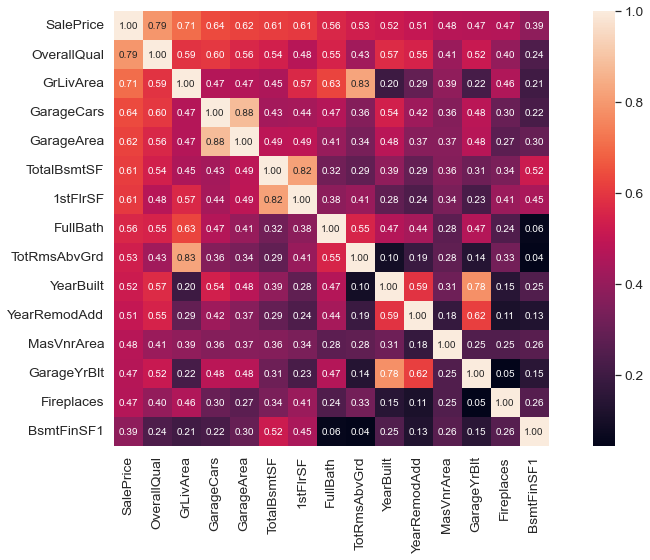

In [301]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
plt.figure(figsize=(16,8))
corrmat = train.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Train & Test Split

In [302]:
train_x,test_x,train_y,test_y = train_test_split(train.drop('SalePrice',axis=1),train['SalePrice'],test_size=0.3,random_state=101)

In [303]:
train_y= train_y.values.reshape(-1,1)
test_y= test_y.values.reshape(-1,1)

sc_X = StandardScaler()
sc_y = StandardScaler()
train_x = sc_X.fit_transform(train_x)
test_x = sc_X.fit_transform(test_x)
train_y = sc_X.fit_transform(train_y)
test_y = sc_y.fit_transform(test_y)

### Linear Regression

In [304]:
lm = LinearRegression()
lm = lm.fit(train_x,train_y)
print(lm.intercept_)
print(lm.coef_)

[6.01577552e-18]
[[ 0.29227066  0.06385503  0.09250571  0.05523021  0.13535228  0.12092387
   0.31143823  0.33894306 -0.0848006  -0.04782152  0.03475496  0.04112028
   0.02382298  0.0491928   0.06039498  0.02899397  0.01541122]]


In [305]:
predictions = lm.predict(test_x)
predictions= predictions.reshape(-1,1)

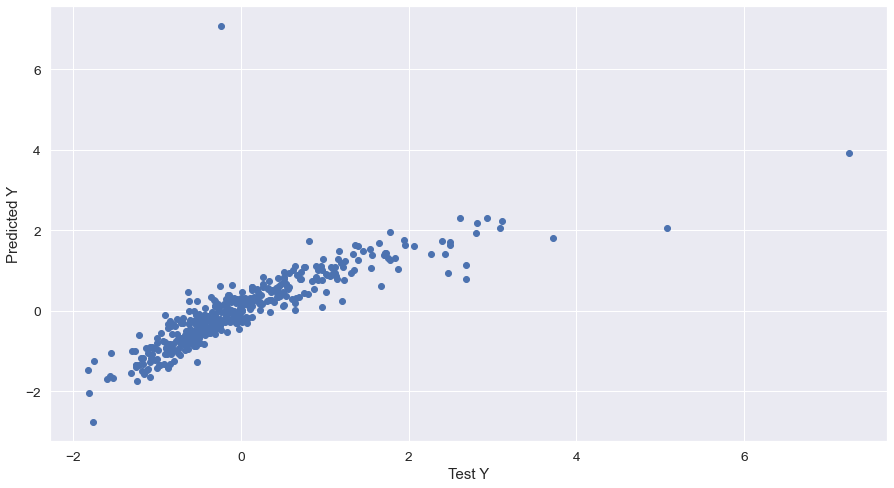

In [306]:
plt.figure(figsize=(15,8))
plt.scatter(test_y,predictions)
plt.xlabel('Test Y')
plt.ylabel('Predicted Y')
plt.show()

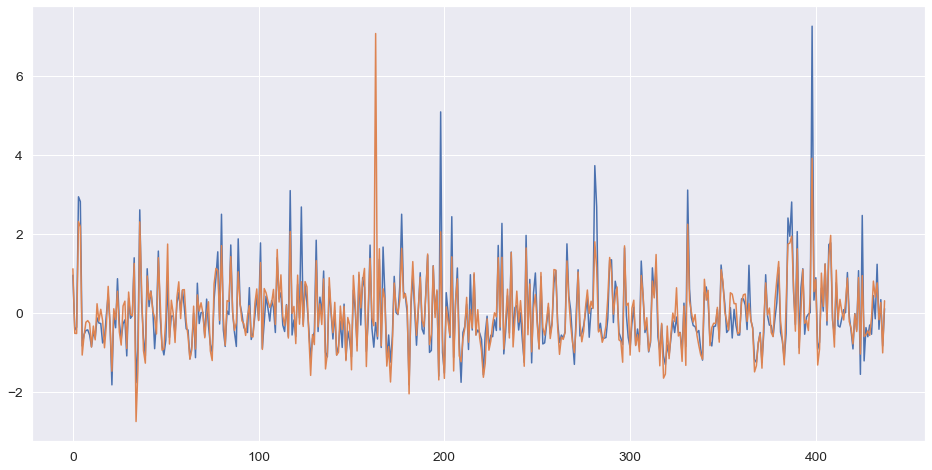

In [307]:
plt.figure(figsize=(16,8))
plt.plot(test_y,label ='Test')
plt.plot(predictions, label = 'predict')
plt.show()

In [308]:
#Evaluation
print('MAE:', metrics.mean_absolute_error(test_y, predictions))
print('MSE:', metrics.mean_squared_error(test_y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, predictions)))

MAE: 0.28939513145279966
MSE: 0.2992402219948465
RMSE: 0.5470285385561219


### Gradient Boosting Regression

In [309]:
gb = ensemble.GradientBoostingRegressor(n_estimators=100,max_depth=4,min_samples_split=2,learning_rate=0.05,loss='quantile')
gb.fit(train_x,train_y)

C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.05, loss='quantile', max_depth=4)

In [310]:
gb_pred = gb.predict(test_x)
gb_pred= gb_pred.reshape(-1,1)

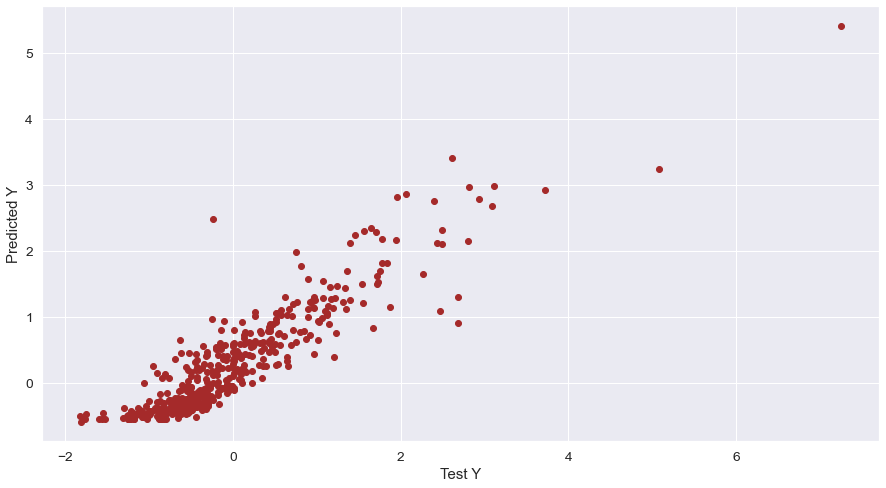

In [311]:
plt.figure(figsize=(15,8))
plt.scatter(test_y,gb_pred,c='brown')
plt.xlabel('Test Y')
plt.ylabel('Predicted Y')
plt.show()

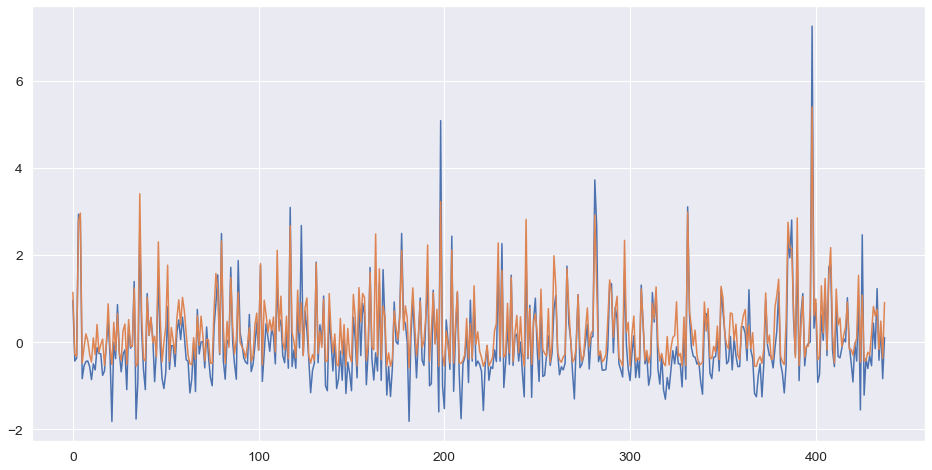

In [312]:
plt.figure(figsize=(16,8))
plt.plot(test_y,label ='Test')
plt.plot(gb_pred, label = 'predict')
plt.show()

In [313]:
#Evaluation
print('MAE:', metrics.mean_absolute_error(test_y, gb_pred))
print('MSE:', metrics.mean_squared_error(test_y, gb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, gb_pred)))

MAE: 0.39324843624890476
MSE: 0.2641508499305172
RMSE: 0.5139560778223341


### Decission Tree Regressor

In [314]:
dtc = DecisionTreeRegressor(random_state=101)
dtc.fit(train_x,train_y)

DecisionTreeRegressor(random_state=101)

In [315]:
dtc_pred = dtc.predict(test_x)
dtc_pred= dtc_pred.reshape(-1,1)

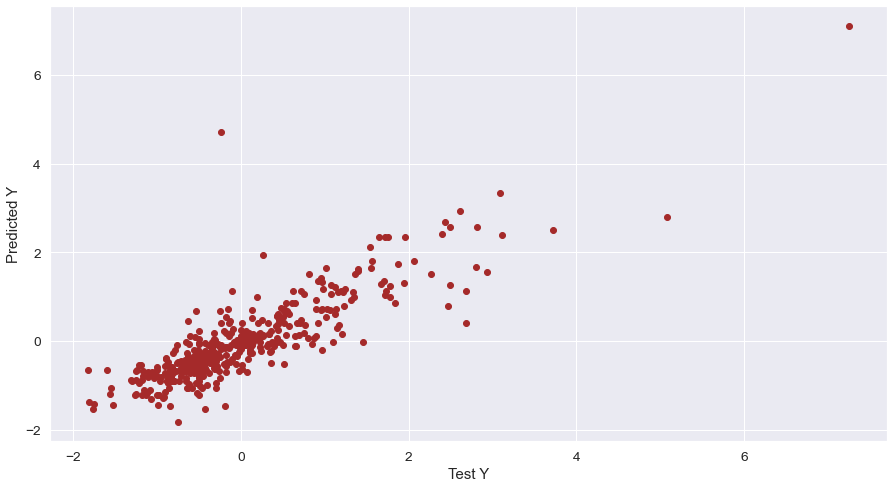

In [316]:
plt.figure(figsize=(15,8))
plt.scatter(test_y,dtc_pred,c='brown')
plt.xlabel('Test Y')
plt.ylabel('Predicted Y')
plt.show()

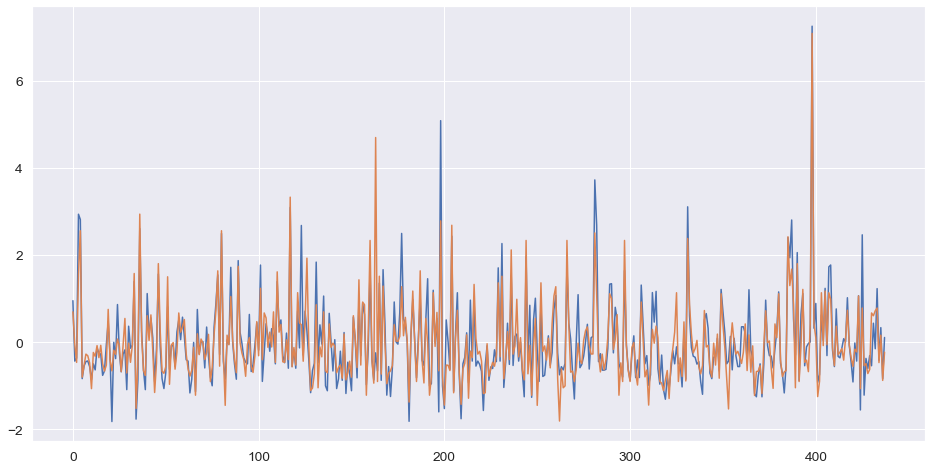

In [317]:
plt.figure(figsize=(16,8))
plt.plot(test_y,label ='Test')
plt.plot(dtc_pred, label = 'predict')
plt.show()

In [318]:
#Evaluation
print('MAE:', metrics.mean_absolute_error(test_y, dtc_pred))
print('MSE:', metrics.mean_squared_error(test_y, dtc_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, dtc_pred)))

MAE: 0.3358235928278879
MSE: 0.2656602771574607
RMSE: 0.515422425935718


### Support Vector Machine Regressor

In [319]:
svm = SVR(kernel='rbf')
svm.fit(train_x,train_y)

C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [320]:
svm_pred = svm.predict(test_x)
svm_pred= svm_pred.reshape(-1,1)

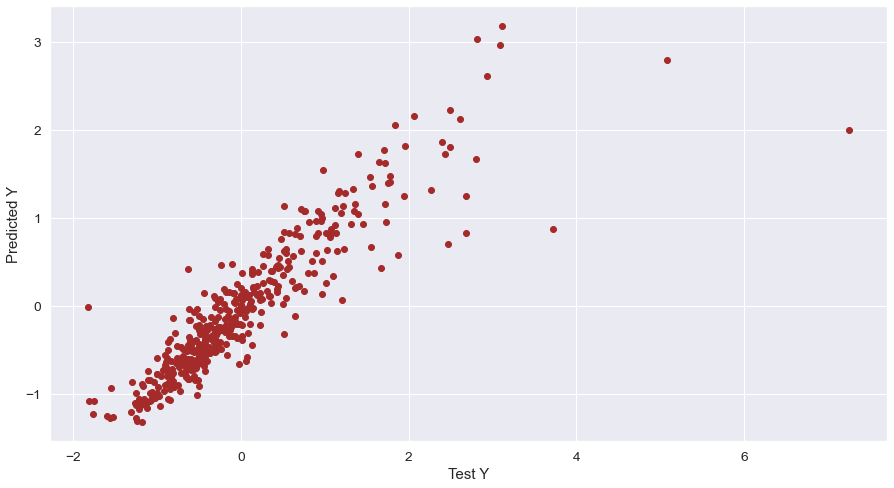

In [321]:
plt.figure(figsize=(15,8))
plt.scatter(test_y,svm_pred,c='brown')
plt.xlabel('Test Y')
plt.ylabel('Predicted Y')
plt.show()

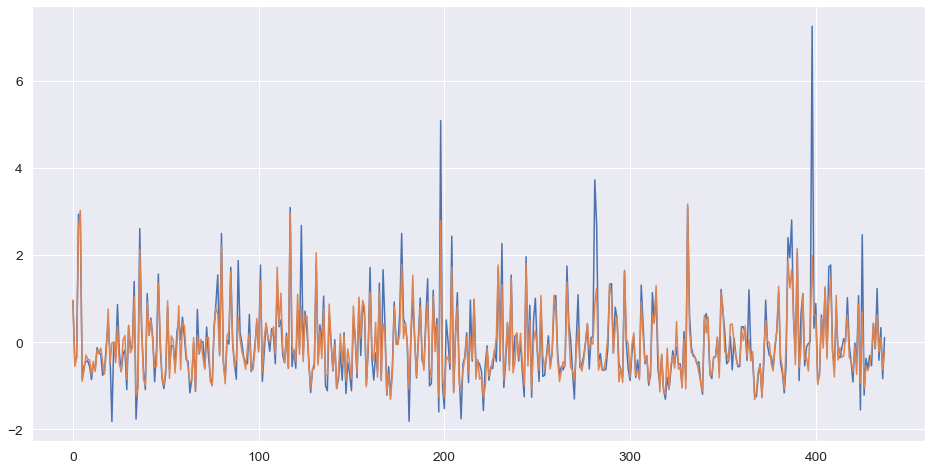

In [322]:
plt.figure(figsize=(16,8))
plt.plot(test_y,label ='Test')
plt.plot(svm_pred, label = 'predict')
plt.show()

In [323]:
#Evaluation
print('MAE:', metrics.mean_absolute_error(test_y, svm_pred))
print('MSE:', metrics.mean_squared_error(test_y, svm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, svm_pred)))

MAE: 0.24652184627345622
MSE: 0.20768473015645228
RMSE: 0.45572440153721444


### Random Forest Regressor

In [324]:
rf = RandomForestRegressor(n_estimators=100,random_state=101)
rf.fit(train_x,train_y)

C:\Users\Nithin\AppData\Local\Temp/ipykernel_8728/3832855533.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_x,train_y)


RandomForestRegressor(random_state=101)

In [325]:
rf_pred = rf.predict(test_x)
rf_pred= rf_pred.reshape(-1,1)

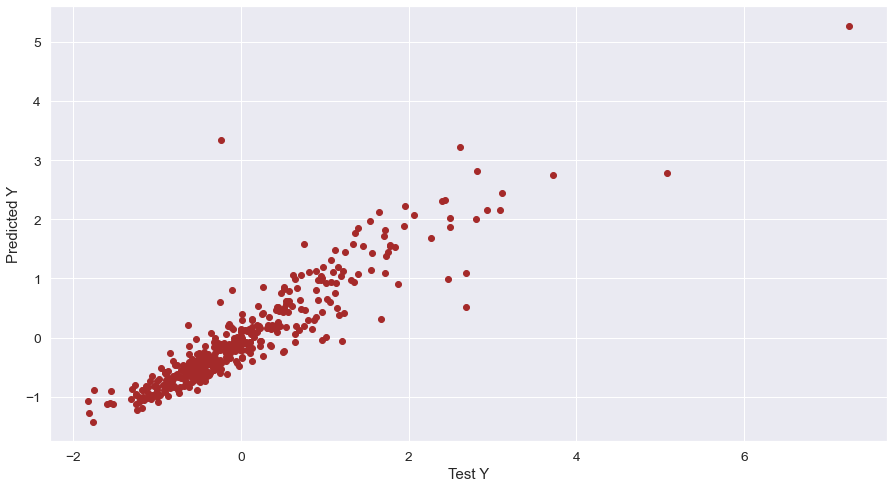

In [326]:
plt.figure(figsize=(15,8))
plt.scatter(test_y,rf_pred,c='brown')
plt.xlabel('Test Y')
plt.ylabel('Predicted Y')
plt.show()

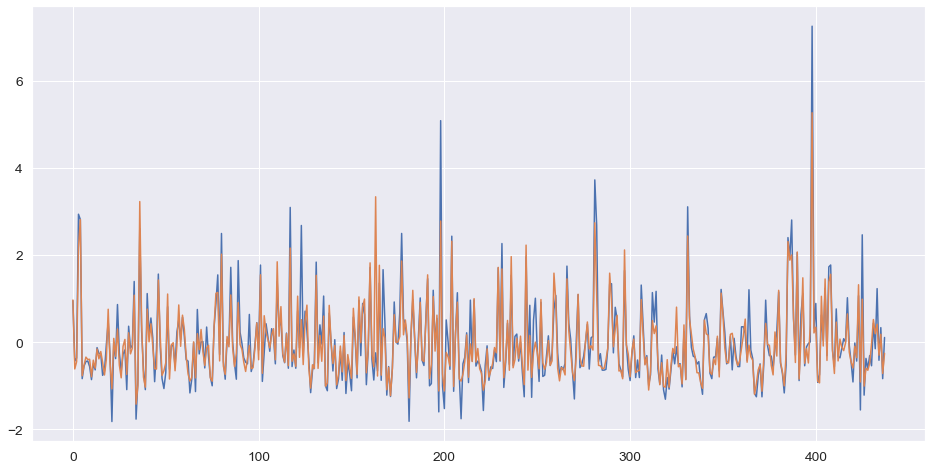

In [327]:
plt.figure(figsize=(16,8))
plt.plot(test_y,label ='Test')
plt.plot(rf_pred, label = 'predict')
plt.show()

In [328]:
#Evaluation
print('MAE:', metrics.mean_absolute_error(test_y, rf_pred))
print('MSE:', metrics.mean_squared_error(test_y, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, rf_pred)))

MAE: 0.24223432767963873
MSE: 0.16312751790925062
RMSE: 0.4038904776164581


### LightGBM

In [329]:
lg = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.1, n_estimators=500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
lg.fit(train_x,train_y)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9, max_bin=55,
              min_data_in_leaf=6, min_sum_hessian_in_leaf=11, n_estimators=500,
              num_leaves=5, objective='regression')

In [330]:
lg_pred = lg.predict(test_x)
lg_pred= lg_pred.reshape(-1,1)

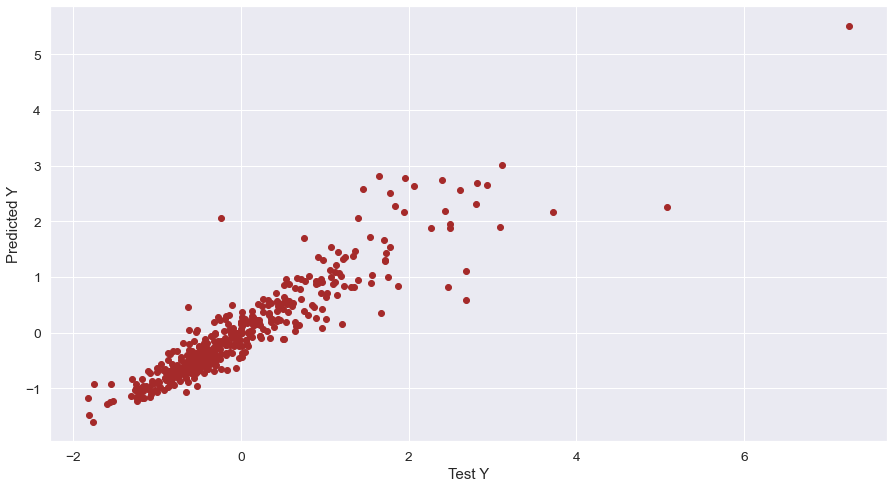

In [331]:
plt.figure(figsize=(15,8))
plt.scatter(test_y,lg_pred,c='brown')
plt.xlabel('Test Y')
plt.ylabel('Predicted Y')
plt.show()

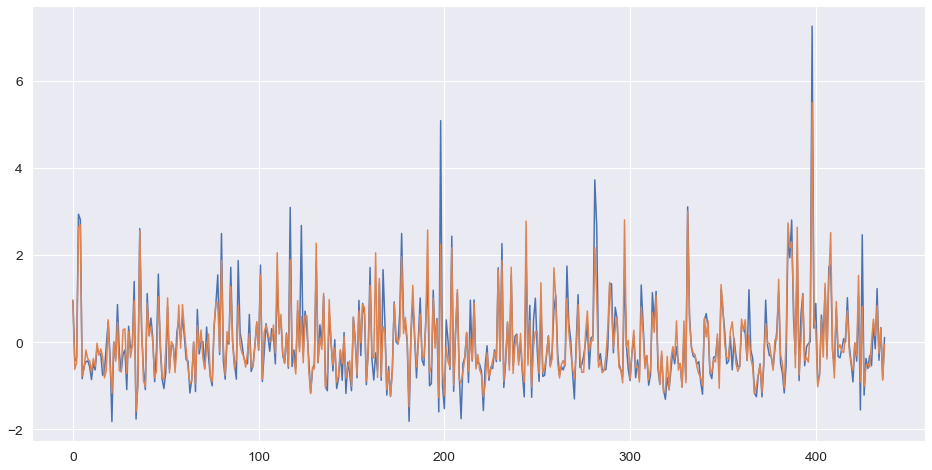

In [332]:
plt.figure(figsize=(16,8))
plt.plot(test_y,label ='Test')
plt.plot(lg_pred, label = 'predict')
plt.show()

In [333]:
#Evaluation
print('MAE:', metrics.mean_absolute_error(test_y, lg_pred))
print('MSE:', metrics.mean_squared_error(test_y, lg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, lg_pred)))

MAE: 0.24356242567038625
MSE: 0.15501018790290114
RMSE: 0.39371333213761145


### Finding Best Model

In [334]:
error_rate=np.array([metrics.mean_squared_error(test_y, predictions),metrics.mean_squared_error(test_y, gb_pred),metrics.mean_squared_error(test_y, dtc_pred),metrics.mean_squared_error(test_y, svm_pred),metrics.mean_squared_error(test_y, rf_pred),metrics.mean_squared_error(test_y, lg_pred)])

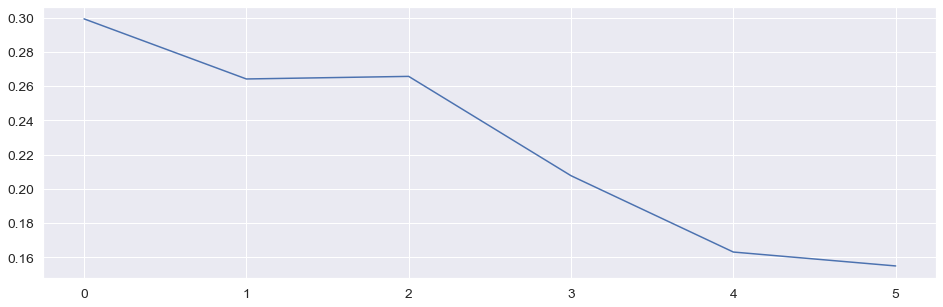

In [335]:
plt.figure(figsize=(16,5))
plt.plot(error_rate)

In [336]:
test = sc_X.fit_transform(test)

In [337]:
lg_predict = lg.predict(test)
lg_predict = lg_predict.reshape(-1,1)

lg_predict = sc_y.inverse_transform(lg_predict)
lg_predict = pd.DataFrame(lg_predict,columns=['SalePrice'])

In [338]:
id_var = pd.read_csv('C:/Users/Nithin/Downloads/Linear Regression/Dataset/test.csv')
id_var = id_var['Id']
id_name = pd.DataFrame(id_var, columns=['Id'])

In [339]:
result = pd.concat([id_name,lg_predict],axis=1)
result.to_excel('C:/Users/Nithin/Downloads/Linear Regression/Result.xlsx')